In [15]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
import os
os.chdir('../DatasetITA/Train')
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA\\Train'

In [17]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [18]:
data

[['a/BC_Word_a_01.png', 'a'],
 ['a/BS_Word_a_02.png', 'a'],
 ['a/DS_Word_a_05.png', 'a'],
 ['a/MA_Word_a_03.png', 'a'],
 ['a/PC_Word_a_04.png', 'a'],
 ['b/BC_Word_b_01.png', 'b'],
 ['b/BS_Word_b_02.png', 'b'],
 ['b/DS_Word_b_05.png', 'b'],
 ['b/MA_Word_b_03.png', 'b'],
 ['b/PC_Word_b_04.png', 'b'],
 ['c/BC_Word_c_01.png', 'c'],
 ['c/BS_Word_c_02.png', 'c'],
 ['c/DS_Word_c_05.png', 'c'],
 ['c/MA_Word_c_03.png', 'c'],
 ['c/PC_Word_c_04.png', 'c'],
 ['d/BC_Word_d_01.png', 'd'],
 ['d/BS_Word_d_02.png', 'd'],
 ['d/DS_Word_d_05.png', 'd'],
 ['d/MA_Word_d_03.png', 'd'],
 ['d/PC_Word_d_04.png', 'd'],
 ['e/BC_Word_e_01.png', 'e'],
 ['e/BS_Word_e_02.png', 'e'],
 ['e/DS_Word_e_05.png', 'e'],
 ['e/MA_Word_e_03.png', 'e'],
 ['e/PC_Word_e_04.png', 'e'],
 ['f/BC_Phrases_f_01.png', 'f'],
 ['f/BS_Phrases_f_02.png', 'f'],
 ['f/DS_Phrases_f_05.png', 'f'],
 ['f/MA_Phrases_f_03.png', 'f'],
 ['f/PC_Phrases_f_04.png', 'f'],
 ['g/BC_Phrases_g_01.png', 'g'],
 ['g/BS_Phrases_g_02.png', 'g'],
 ['g/DS_Phrases_g_0

In [19]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA\\Train'

In [20]:
len(data)

50

In [21]:
import csv
os.chdir('../../codesITA')
header = ['filename', 'label']

with open('training_labelsITA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [22]:
train_data = pd.read_csv('training_labelsITA.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 2)

skf = StratifiedKFold(n_splits = 2, random_state = 7, shuffle = True)

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [ ]:
idg = ImageDataGenerator(rescale=1./255)

In [10]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [11]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam_20.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32, (2, 2), input_shape=(224, 224, 1), activation='relu', strides=2, name='convo1'))
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo2'))
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))

    # Step 2 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo3'))
    # Step 2 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    # Step 3 - Convolution
    classifier.add(Convolution2D(64, (3, 3), activation='relu', name='convo4'))
    # Step 3 - Pooling
    classifier.add(MaxPooling2D(pool_size=(2, 2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(1024, activation='relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    classifier.add(Dropout((0.4)))
    classifier.add(Dense(10, activation='softmax'))

    return classifier




Found 25 validated image filenames belonging to 10 classes.
Found 25 validated image filenames belonging to 10 classes.
Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 3.0279 - accuracy: 0.1600
Epoch 00001: val_accuracy improved from -inf to 0.08000, saving model to saved_models(20epoch)ITA\model_1.h5
1/1 [==============================] - 2s 2s/step - loss: 3.0279 - accuracy: 0.1600 - val_loss: 2.3904 - val_accuracy: 0.0800
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 2.6609 - accuracy: 0.2800
Epoch 00002: val_accuracy did not improve from 0.08000
1/1 [==============================] - 1s 681ms/step - loss: 2.6609 - accuracy: 0.2800 - val_loss: 2.4430 - val_accuracy: 0.0800
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 2.1651 - accuracy: 0.5600
Epoch 00003: val_accuracy did not improve from 0.08000
1/1 [==============================] - 1s 685ms/step - loss: 2.1651 - accuracy: 0.5600 - val_loss: 2.4923 - val_accuracy: 0.0400
E

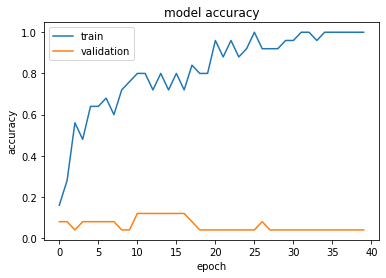

Found 25 validated image filenames belonging to 10 classes.
Found 25 validated image filenames belonging to 10 classes.
Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 3.4075 - accuracy: 0.1200
Epoch 00001: val_accuracy improved from -inf to 0.12000, saving model to saved_models(20epoch)ITA\model_2.h5
1/1 [==============================] - 1s 1s/step - loss: 3.4075 - accuracy: 0.1200 - val_loss: 2.3696 - val_accuracy: 0.1200
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 3.6199 - accuracy: 0.2400
Epoch 00002: val_accuracy did not improve from 0.12000
1/1 [==============================] - 1s 658ms/step - loss: 3.6199 - accuracy: 0.2400 - val_loss: 2.3683 - val_accuracy: 0.0800
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 2.4689 - accuracy: 0.3600
Epoch 00003: val_accuracy did not improve from 0.12000
1/1 [==============================] - 1s 662ms/step - loss: 2.4689 - accuracy: 0.3600 - val_loss: 2.3586 - val_accuracy: 0.0400
E

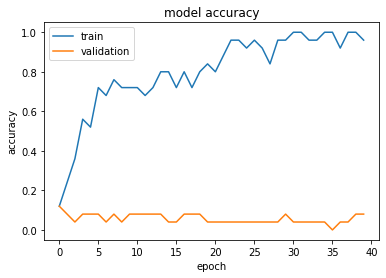

In [12]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(20epoch)ITA/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(50),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../DatasetITA/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../DatasetITA/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=40,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(20epoch)ITA/model_"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 1

In [13]:
VALIDATION_ACCURACY

[0.11999999731779099, 0.11999999731779099]

In [14]:
VALIDATION_LOSS

[2.5221633911132812, 2.369551420211792]